#### Matches section 3.1 in Helen Wall's course

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            accuracy_score, precision_score, \
                            recall_score,roc_curve, roc_auc_score

In [21]:
#data = pd.read_csv("C:\\Users\\jchkh\\Desktop\\Logit_HelenWall\\Data Sources\\binomial (training).csv")
data = pd.read_csv("C:\\Users\\jchkh\\Desktop\\HW_Logit\\git_h\\Data Sources\\binomial (training).csv")

y_train = data[['Win/Loss (Win 1, Loss 0)']]
x_train = data[['Points Team Scored','Home/Away (Home 1, Away 0)','Field Goal %']]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Data exploration: Pairplot

Check for multicollinearity between independent variables

Helen wall does this in 3.3, but with correlation number. 

Pairplots allow visualization and segmentation

In [34]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


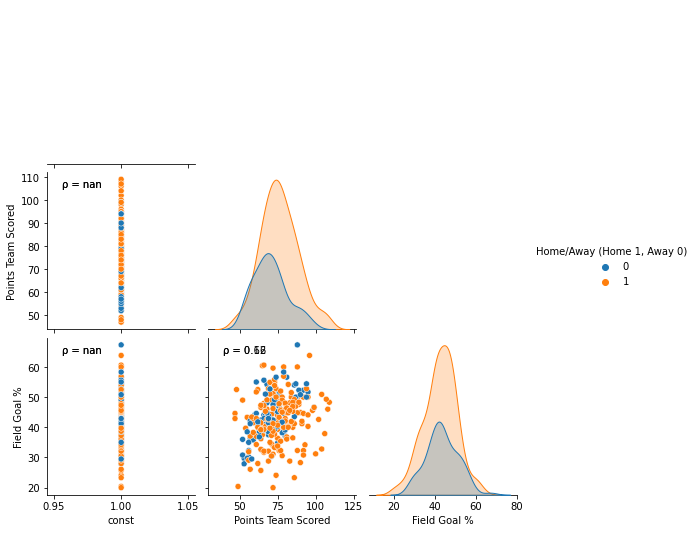

In [38]:
g = sns.pairplot(x_train, hue="Home/Away (Home 1, Away 0)", corner=True)
#g = sns.pairplot(x_train)

g.map_lower(corrfunc)
plt.show()

# Modelling

In [ ]:
#Adds intercept term to match R's default glm behavior
#In excel solver, akin to unchecking "Make unconstrained variables non-negative"
#Source: https://stackoverflow.com/questions/64229454/different-glm-result-for-python-and-r-with-binomial-regression

x_train = sm.add_constant(x_train)

In [23]:
lm = sm.GLM(y_train, x_train, family=sm.families.Binomial()).fit()

In [40]:
print(lm.summary())

                    Generalized Linear Model Regression Results                     
Dep. Variable:     Win/Loss (Win 1, Loss 0)   No. Observations:                  267
Model:                                  GLM   Df Residuals:                      263
Model Family:                      Binomial   Df Model:                            3
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -142.82
Date:                      Tue, 31 May 2022   Deviance:                       285.64
Time:                              14:41:21   Pearson chi2:                     249.
No. Iterations:                           5                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

In [25]:
data['predicted'] = lm.predict(x_train)

In [26]:
data['predicted_win'] = np.nan

data.loc[data['predicted'] >= 0.5, 'predicted_win'] = 1
data.loc[data['predicted'] < 0.5, 'predicted_win']  = 0

## Predict on test data

In [48]:
data_test = pd.read_csv("C:\\Users\\jchkh\\Desktop\\HW_Logit\\git_h\\Data Sources\\binomial (testing).csv")

y_test = data_test[['Win/Loss (Win 1, Loss 0)']]
x_test = data_test[['Points Team Scored','Home/Away (Home 1, Away 0)','Field Goal %']]

x_test = sm.add_constant(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [49]:
data_test['predicted'] = lm.predict(x_test)

In [52]:
data_test['predicted_win'] = np.nan

data_test.loc[data_test['predicted'] >= 0.5, 'predicted_win'] = 1
data_test.loc[data_test['predicted'] < 0.5, 'predicted_win']  = 0

# Evaluate model

Confusion matrix on test data performance

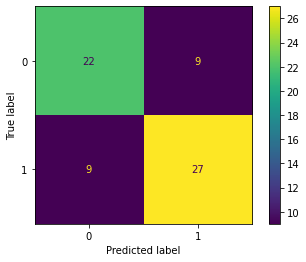

In [58]:
cm = confusion_matrix(y_test, data_test['predicted_win'])

d_cm = ConfusionMatrixDisplay(cm)
d_cm.plot()

In [85]:
# Get accucary, recall, precision

print ('''
       Accuracy (TP+TN)/(P+N): {}
       Recall   (TP/P)       : {}
       Precision (TP/(TP+FP)): {}
       '''.format(accuracy_score(y_test, data_test['predicted_win']),
                                 precision_score(y_test, data_test['predicted_win']),
                                 recall_score(y_test, data_test['predicted_win'])))


       Accuracy (TP+TN)/(P+N): 0.7313432835820896
       Recall   (TP/P)       : 0.75
       Precision (TP/(TP+FP)): 0.75
       


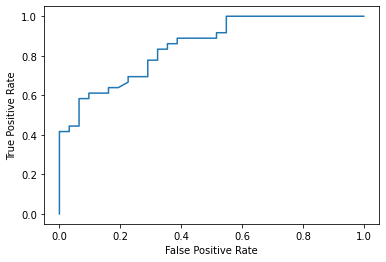

AUC (area under curve): 0.8481182795698925


In [84]:
# Get ROC curve

fpr, tpr, _ = roc_curve(y_test, data_test['predicted'])

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('AUC (area under curve): {}'.format(roc_auc_score(y_test, data_test['predicted'])))

# Plotting

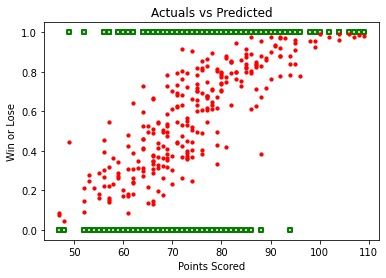

In [27]:
plt.scatter(data['Points Team Scored'], data['Win/Loss (Win 1, Loss 0)'], c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 20)
 
plt.scatter(data['Points Team Scored'], data['predicted'], c ="yellow",
            linewidths = 2,
            marker ="o",
            edgecolor ="red",
            s = 5)

plt.xlabel("Points Scored")
plt.ylabel("Win or Lose")
plt.title("Actuals vs Predicted")
plt.show()